In [1]:
%pylab inline
from sci378 import *
from lmfit import *

Populating the interactive namespace from numpy and matplotlib
Version:  0.0.18


In [2]:
#trying the big fancy loop...11 models, 97 data points per trial, 265 trials...should be interesting

In [3]:
def Weibull(t,Linf=1,β=1,k=1,δ=1):
    return Linf - (Linf-β)*exp(-(k*t)**δ)

In [4]:
def Morgan_Mercer_Flodin(t,Linf=1,β=1,k=1,δ=1):
    return Linf - (Linf-β)/(1+(k*t)**δ)

In [5]:
def Gompertz_3(t,Linf=1,k=1,l=1):
    return Linf*(exp(exp(-k*(t-l))))

In [6]:
def Gompertz_4(t,A=1,B=1,k=1,l=1):
    return A+B*exp(exp(-k*(t-l)))

In [7]:
def Janoschek(t,Linf=1,β=1,k=1,δ=1):
    return Linf - (Linf-β)*exp(-k*t**δ)

In [8]:
def Richard_4(t,Linf=1,δ=1,k=1,γ=1):
    return Linf*(1+(δ-1)*exp(-k*(t-γ)))**(1/(1-δ))

In [9]:
def Richard_5(t,β=1,T=1,tm=1,k=1,Linf=1):
    return β+Linf/(1+T*exp(-k*(t-tm))**(1/T))

In [10]:
def Exponential(t,Linf=1,β=1,k=1):
    return Linf - (Linf - β)*exp(-(k*t))

In [11]:
def Von_Bertalanffy(t,Linf=1,K=1,to=1):
    return Linf*(1-exp(-K*(t-to)))

In [12]:
def Log_3(t,Linf=1,k=1,l=1):
    return Linf/(1 + exp(-k*(t-l)))

In [13]:
def Log_4(t,α=1,Linf=1,k=1,δ=1):
    return α+(Linf-α)/(1+exp((k-t)/δ))

In [14]:
def do_all_my_fits(t,y):
    
    weibullModel=Model(Weibull)
    params_Weibull=weibullModel.make_params()
    params_Weibull['Linf']=Parameter("Linf",value=.5)
    params_Weibull['β']=Parameter("β",value=.1)
    params_Weibull['k']=Parameter("k",min=0,max=2,value=.1)
    params_Weibull['δ']=Parameter("δ",value=.1)
    results_Weibull=weibullModel.fit(y, params_Weibull, t=t)
    
    mmfModel=Model(Morgan_Mercer_Flodin)
    params_MMF=mmfModel.make_params()
    params_MMF['Linf']=Parameter("Linf",value=.5)
    params_MMF['β']=Parameter("β",value=.1)
    params_MMF['k']=Parameter("k",min=0,max=2,value=.1)
    params_MMF['δ']=Parameter("δ",value=.1)
    results_MMF=mmfModel.fit(y, params_MMF, t=t)

    gompertz3Model=Model(Gompertz_3)
    params_G3=gompertz3Model.make_params()
    params_G3['Linf']=Parameter("Linf",value=-.15)
    params_G3['k']=Parameter("k",value=.1)
    params_G3['l']=Parameter("l",value=.1)
    results_G3=gompertz3Model.fit(y, params_G3, t=t)

    g4Model=Model(Gompertz_4)
    params_g4=g4Model.make_params()
    params_g4['A']=Parameter("A",value=.5)
    params_g4['B']=Parameter("B",value=.1)
    params_g4['k']=Parameter("k",value=.1)
    params_g4['l']=Parameter("l",value=.1)
    results_g4=g4Model.fit(y, params_g4, t=t)

    janModel=Model(Janoschek)
    params_Jan=janModel.make_params()
    params_Jan['Linf']=Parameter("Linf",value=.5)
    params_Jan['β']=Parameter("β",min=0,max=5*max(y),value=.1)
    params_Jan['k']=Parameter("k",min=-1,max=5*max(y),value=.1)
    params_Jan['δ']=Parameter("δ",min=0,max=2*max(y),value=.1)
    results_Jan=janModel.fit(y, params_Jan, t=t)
    
    r4Model=Model(Richard_4)
    params_r4=r4Model.make_params()
    params_r4['Linf']=Parameter("Linf",max=1,value=.5)
    params_r4['δ']=Parameter("δ",value=.1)
    params_r4['k']=Parameter("k",value=.1)
    params_r4['γ']=Parameter("γ",value=.1)
    results_r4=r4Model.fit(y, params_r4, t=t)

    r5Model=Model(Richard_5)
    params_r5=r5Model.make_params()
    params_r5['β']=Parameter("β",value=.5)
    params_r5['T']=Parameter("T",value=.1)
    params_r5['tm']=Parameter("tm",value=.1)
    params_r5['k']=Parameter("k",value=.1)
    params_r5['Linf']=Parameter("Linf",value=.1)
    results_r5=r5Model.fit(y, params_r5, t=t)

    expModel=Model(Exponential)
    params_exp=expModel.make_params()
    params_exp['Linf']=Parameter("Linf",value=.5)
    params_exp['β']=Parameter("β",value=.1)
    params_exp['k']=Parameter("k",value=.1)
    results_exp=expModel.fit(y, params_exp, t=t)
    
    vonBModel=Model(Von_Bertalanffy)
    params_vonB=vonBModel.make_params()
    params_vonB['Linf']=Parameter("Linf",value=.5)
    params_vonB['K']=Parameter("K",value=.1)
    params_vonB['to']=Parameter("to",min=0.1,max=1,value=.1)
    results_vonB=vonBModel.fit(y, params_vonB, t=t)
    
    l3Model=Model(Log_3)
    params_l3=l3Model.make_params()
    params_l3['Linf']=Parameter("Linf",value=.5)
    params_l3['k']=Parameter("k",value=.1)
    params_l3['l']=Parameter("l",value=.1)
    results_l3=l3Model.fit(y, params_l3, t=t)
    
    l4Model=Model(Log_4)
    params_l4=l4Model.make_params()
    params_l4['α']=Parameter("α",value=.5)
    params_l4['Linf']=Parameter("Linf",value=.5)
    params_l4['k']=Parameter("k",value=.1)
    params_l4['δ']=Parameter("δ",value=.1)
    results_l4=l4Model.fit(y, params_l4, t=t)
    
    return results_Weibull,results_MMF,results_G3,results_g4,results_Jan,results_r4,results_r5,results_exp,results_vonB,results_l3,results_r4

In [15]:
data=pd.read_excel("allbacteriadata.xlsx")
t=data["Time"]
y=data["Batch 1"]

results_Weibull,results_MMF,results_G3,results_g4,results_Jan,results_r4,results_r5,results_exp,results_vonB,results_l3,results_r4=do_all_my_fits(t,y)

In [16]:
do_all_my_fits(t,y)

(<lmfit.model.ModelResult at 0x21bf3bb37f0>,
 <lmfit.model.ModelResult at 0x21bf3ca4eb0>)

In [17]:
results_Weibull.bic

-1055.1221547327948

In [18]:
print(results_Weibull.bic)
print(results_MMF.bic)
print(results_G3.bic)
print(results_g4.bic)
print(results_Jan.bic)
print(results_r4.bic)
print(results_r5.bic)
print(results_exp.bic)
print(results_vonB.bic)
print(results_l3.bic)
print(results_r4.bic)

-1055.1221547327948
-1031.334607478719
-448.0484564868015
-443.4737455082982
-714.9515345778048
-985.3324474405053
-438.8990345289752
-756.7029463857584
-709.4561183910572
-873.945159609996
-985.3324474405053


In [19]:
S=Storage()
for i in range(1,10):
    #load data to get t, y
    t=data["Time"]
    #name=f'Batch {i}"
    #y=data[columnname]
    y=data["Batch "+str(i)]
    S+=[_.bic for _ in do_all_my_fits(t,y)]
bic=S.arrays()
#test this for a few, then will get spit out version of all


In [20]:
S.arrays()

(array([-1055.12215473, -1045.94557388, -1045.37357984,  -992.38973862,
        -1015.72344148, -1068.72395856, -1062.79874431, -1087.66427392,
         -992.94686759]),
 array([-1031.33460748, -1022.41995166, -1075.40079704,  -989.612302  ,
        -1037.91275535, -1082.90479191, -1095.06461451, -1094.4031959 ,
         -982.25393673]),
 array([-448.04845649, -433.75550433, -445.20293814, -433.36797906,
        -440.51519744, -438.35702975, -454.30794867, -460.54805096,
        -405.19025185]),
 array([-443.47374551, -429.18079335, -440.62822716, -428.79326808,
        -435.94048647, -433.78231877, -449.73323769, -455.97333998,
        -400.61554087]),
 array([-714.95153458, -718.25635515, -731.25565228, -736.41821404,
        -731.79276726, -749.40915078, -738.92801686, -738.69194434,
        -701.77206052]),
 array([-985.33244744, -986.33520171, -979.61702089, -950.79238034,
        -962.8839843 , -998.62450675, -968.76766609, -984.66358362,
        -926.2720346 ]),
 array([-438.899

In [21]:
#for i in range(1,265):
 #   y=data["Batch "+str(i)]
    #plot(x_data,y_data,'o')
  #  do_all_my_fits(t,y)
#gca().set_xticks(arange(0,55,5));
#title("Microbial Growth")
#xlabel("Time")
#ylabel("Concentration?")

In [22]:
w=average(S.arrays())

In [23]:
w

-766.3932131692598

In [24]:
Weibull_average=round(average([-1055.12215473, -1045.94557388, -1045.37357984,  -992.38973862,
        -1015.72344148, -1068.72395856, -1062.79874431, -1087.66427392,
         -992.94686759]),5)
MMF_average=round(average([-1031.33460748, -1022.41995166, -1075.40079704,  -989.612302  ,
        -1037.91275535, -1082.90479191, -1095.06461451, -1094.4031959 ,
         -982.25393673]),5)
G3_average=round(average([-448.04845649, -433.75550433, -445.20293814, -433.36797906,
        -440.51519744, -438.35702975, -454.30794867, -460.54805096,
        -405.19025185]),5)
G4_average=round(average([-443.47374551, -429.18079335, -440.62822716, -428.79326808,
        -435.94048647, -433.78231877, -449.73323769, -455.97333998,
        -400.61554087]),5)
Jan_average=round(average([-714.95153458, -718.25635515, -731.25565228, -736.41821404,
        -731.79276726, -749.40915078, -738.92801686, -738.69194434,
        -701.77206052]),5)
R4_average=round(average([-985.33244744, -986.33520171, -979.61702089, -950.79238034,
        -962.8839843 , -998.62450675, -968.76766609, -984.66358362,
        -926.2720346]),5)
R5_average=round(average([-438.89903453, -424.60608237, -436.05351619, -424.2185571 ,
        -431.36577549, -429.20760779, -445.15852671, -451.398629  ,
        -396.04082989]),5)
Exp_average=round(average([-756.70294639, -756.68725387, -774.69666478, -772.13747696,
        -774.8006242 , -792.10657508, -778.89035708, -781.42384332,
        -724.58582832]),5)
vonB_average=round(average([-709.45611839, -710.82619247, -704.78685284, -718.87511357,
        -715.16849703, -722.52337278, -711.55122944, -702.19910603,
        -655.01576705]),5)
L3_average=round(average([-873.94515961, -888.67402341, -905.50650369, -900.29476974,
        -906.25015364, -937.85086736, -887.52892253, -888.55306403,
        -841.47931371]),5)
L4_average=round(average([-985.33244744, -986.33520171, -979.61702089, -950.79238034,
        -962.8839843 , -998.62450675, -968.76766609, -984.66358362,
        -926.2720346]),5)

In [25]:
print("Weibull Average: "+str(Weibull_average))
print("Morgan-Mercer Flodin Average: "+str(MMF_average))
print("Gompertz 3 Parameter Average: "+str(G3_average))
print("Gompertz 4 Parameter Average: "+str(G4_average))
print("Janoschek Average: "+str(Jan_average))
print("Richard 4 Parameter Average: "+str(R4_average))
print("Richard 5 Parameter Average: "+str(R5_average))
print("Exponential Average: "+str(Exp_average))
print("Von Bertalanffy Average: "+str(vonB_average))
print("Logistic 3 Parameter Average: "+str(L3_average))
print("Logistic 4 Parameter Average: "+str(L4_average))

Weibull Average: -1040.74315
Morgan-Mercer Flodin Average: -1045.70077
Gompertz 3 Parameter Average: -439.92148
Gompertz 4 Parameter Average: -435.34677
Janoschek Average: -729.05286
Richard 4 Parameter Average: -971.47654
Richard 5 Parameter Average: -430.77206
Exponential Average: -768.00351
Von Bertalanffy Average: -705.60025
Logistic 3 Parameter Average: -892.23142
Logistic 4 Parameter Average: -971.47654


In [26]:
print("Winner = Richard 5, Loser = MMF!")

Winner = Richard 5, Loser = MMF!


Text(0, 0.5, 'Size')

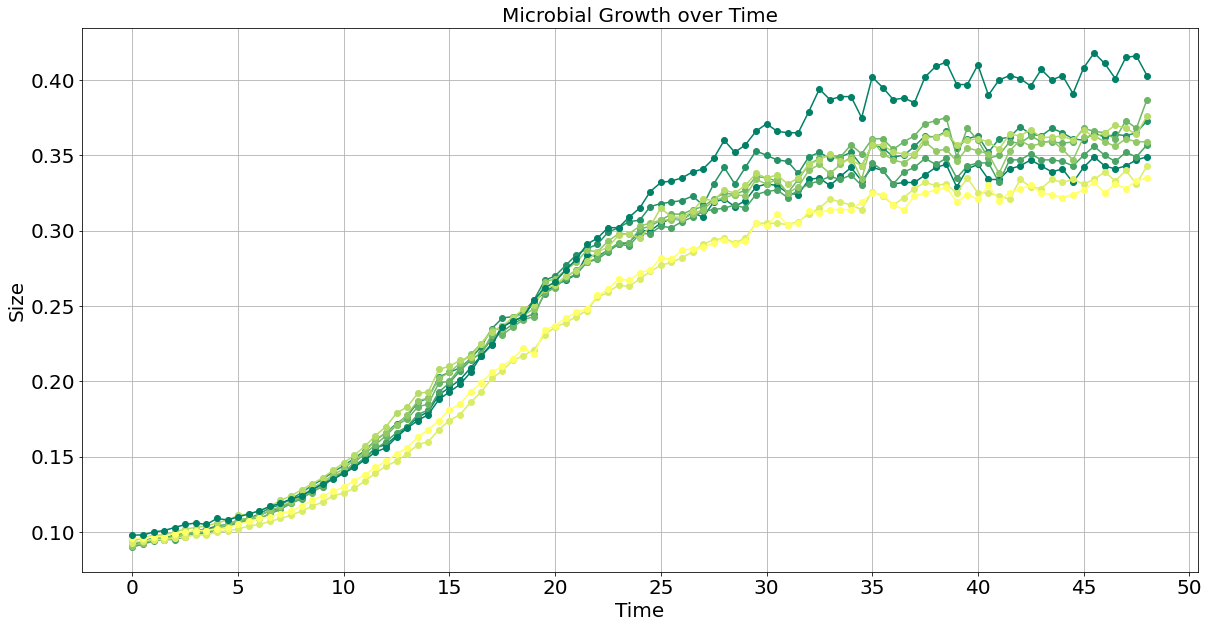

In [27]:
set_plot_colors('summer',8)
figure(figsize=(20,10))
gca().set_xticks(arange(0,55,5));
for i in range(1,10):
    t=data["Time"]
    y=data["Batch "+str(i)]
    plot(t,y,'-o')
title("Microbial Growth over Time")
xlabel("Time")
ylabel("Size")
    #S+=[_.bic for _ in do_all_my_fits(t,y)]

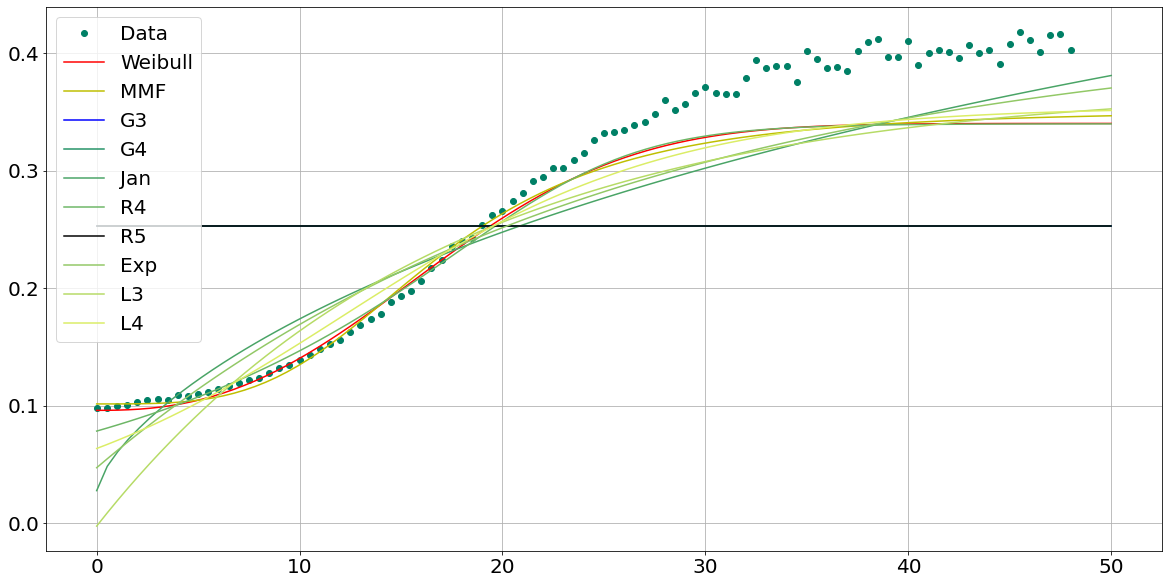

In [28]:
figure(figsize=(20,10))
x_fake=linspace(0,50,97)
plot(t,y,'o')
plot(x_fake,results_Weibull.eval(t=x_fake),'r-')
plot(x_fake,results_MMF.eval(t=x_fake),'y-')
plot(x_fake,results_G3.eval(t=x_fake),'b-')
plot(x_fake,results_g4.eval(t=x_fake),'-')
plot(x_fake,results_Jan.eval(t=x_fake),'-')
plot(x_fake,results_r4.eval(t=x_fake),'-')
plot(x_fake,results_r5.eval(t=x_fake),'k-')
plot(x_fake,results_exp.eval(t=x_fake),'-')
plot(x_fake,results_vonB.eval(t=x_fake),'-')
plot(x_fake,results_l3.eval(t=x_fake),'-')
#plot(x_fake,results_l4.eval(t=x_fake),'-')
model_names=['Data','Weibull','MMF','G3','G4','Jan','R4','R5','Exp','L3','L4','von B']
legend(model_names)

In [29]:
def just_do_r5(t,y):
    r55Model=Model(Richard_5)
    params_r55=r55Model.make_params()
    params_r55['β']=Parameter("β",value=.5)
    params_r55['T']=Parameter("T",value=.1)
    params_r55['tm']=Parameter("tm",value=.1)
    params_r55['k']=Parameter("k",value=.1)
    params_r55['Linf']=Parameter("Linf",value=.1)
    results_r55=r55Model.fit(y, params_r55, t=t)
    
    return results_r55.bic

In [30]:
data=pd.read_excel("allbacteriadata.xlsx")
t=data["Time"]
y=data["Batch 1"]

In [31]:
just_do_r5(t,y)

-438.8990345289752

In [32]:
data=pd.read_excel("allbacteriadata.xlsx")
St=Storage()
for i in range(1,257):
    t=data["Time"]
    y=data["Batch "+str(i)]
    St+=[just_do_r5(t,y)]
bic=St.arrays()

In [33]:
allR5=St.arrays()

In [34]:
allR5

array([-438.89903453, -424.60608237, -436.05351619, -424.2185571 ,
       -431.36577549, -429.20760779, -445.15852671, -451.398629  ,
       -396.04082989, -340.58117477, -354.42892623, -374.08136126,
       -312.01528999, -293.4161032 , -301.55188299, -375.99023582,
       -352.31406565, -325.82907582, -319.10970821, -325.51749948,
       -300.26540881, -304.30789555, -301.27036537, -302.16420791,
       -552.52914619, -566.92802192, -559.33604358, -576.91142846,
       -557.3957837 , -499.16417801, -494.64557108, -500.30855257,
       -514.87287239, -584.47356647, -592.81391326, -596.15055882,
       -535.42701076, -499.02953368, -484.3146933 , -564.49507043,
       -569.06250525, -570.87892357, -531.12974575, -531.91270834,
       -551.58535699, -589.10462964, -587.29287169, -518.66071148,
       -422.52851249, -416.22228596, -424.82948939, -429.69952719,
       -429.89187879, -414.76975228, -439.00582563, -441.39523647,
       -401.23269553, -327.90788854, -335.42199328, -330.65893

In [35]:
average(allR5)

-481.4344064769761

Text(0, 0.5, 'Size')

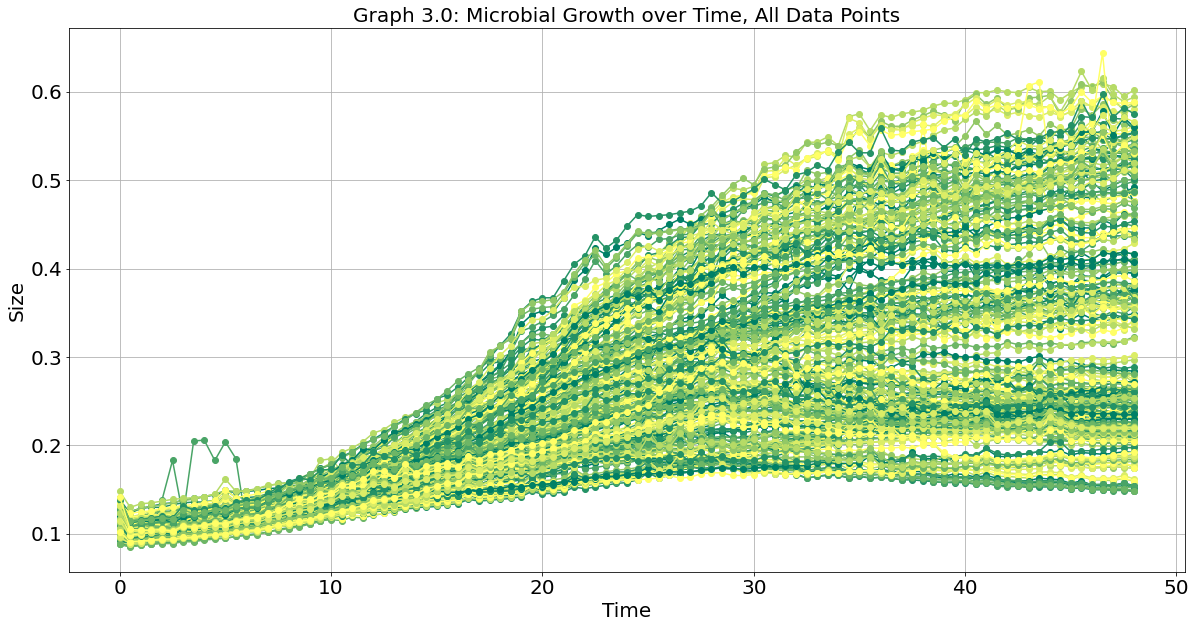

In [37]:
set_plot_colors('summer',8)
figure(figsize=(20,10))
x_fake=linspace(0,50,97)
#q=array[just_do_r5.results_r55.eval(t=x_fake)]
data=pd.read_excel("allbacteriadata.xlsx")
for i in range(1,257):
    t=data["Time"]
    y=data["Batch "+str(i)]
    plot(t,y,'-o')
    #plot(x_fake,q,'-')
title("Graph 3.0: Microbial Growth over Time, All Data Points")
xlabel("Time")
ylabel("Size")